# CARVANA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from sklearn.feature_selection import VarianceThreshold, RFECV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, validation_curve

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

In [2]:
data = pd.read_csv("Carvana/carvana.csv", index_col=0 ,sep=',')

In [3]:
data

,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
RefId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1/7/2009 0:12,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,0
2,1/7/2009 0:12,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,0
3,1/7/2009 0:12,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,0
4,1/7/2009 0:12,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,WHITE,AUTO,2.0,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,3901.0,4908.0,6706.0,8577.0,4709.0,5827.0,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594,0
5,1/21/2009 0:12,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,76173,AMERICAN,LARGE TRUCK,CHRYSLER,6407.0,8051.0,10378.0,12443.0,7159.0,8934.0,11135.0,12560.0,NaN,NaN,19638,33619,FL,8800.0,0,920,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6794,1/18/2009 0:11,ADESA,2006,3,SUZUKI,FORENZA,NaN,4D SEDAN,RED,AUTO,2.0,Covers,60549,OTHER ASIAN,MEDIUM,OTHER,3905.0,4892.0,4717.0,5783.0,3556.0,4714.0,6629.0,8766.0,NaN,NaN,18111,30212,NaN,5600.0,0,533,0
6795,1/24/2009 0:11,ADESA,2005,4,JEEP,LIBERTY 4WD V6,Spo,4D SUV,RED,AUTO,1.0,Alloy,85377,AMERICAN,SMALL SUV,CHRYSLER,7104.0,8601.0,8172.0,9789.0,7536.0,8859.0,11223.0,12190.0,NaN,NaN,18881,30212,NaN,6600.0,0,983,0
6796,1/24/2009 0:11,ADESA,2002,7,CHEVROLET,TRAILBLAZER EXT 2WD,LT,4D SUV 4.2L LT,BEIGE,AUTO,1.0,Alloy,75700,AMERICAN,MEDIUM SUV,GM,5095.0,5988.0,6003.0,6967.0,5720.0,7185.0,8125.0,9754.0,NaN,NaN,18881,30212,NaN,7000.0,0,1455,0


In [4]:
data.shape

(6798, 33)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6798 entries, 1 to 6798
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          6798 non-null   object 
 1   Auction                            2983 non-null   object 
 2   VehYear                            6798 non-null   int64  
 3   VehicleAge                         6798 non-null   int64  
 4   Make                               6798 non-null   object 
 5   Model                              6798 non-null   object 
 6   Trim                               6566 non-null   object 
 7   SubModel                           6798 non-null   object 
 8   Color                              6798 non-null   object 
 9   Transmission                       6798 non-null   object 
 10  WheelTypeID                        6515 non-null   float64
 11  WheelType                          6459 non-null   objec

In [6]:
#Auction, Primeunit, Aucguart, VNST imaju previse nedostajucih vrednosti, pa ih iskljucujemo iz dalje analize

In [7]:
data.drop(['Auction', 'PRIMEUNIT', 'AUCGUART', 'VNST'], axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6798 entries, 1 to 6798
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          6798 non-null   object 
 1   VehYear                            6798 non-null   int64  
 2   VehicleAge                         6798 non-null   int64  
 3   Make                               6798 non-null   object 
 4   Model                              6798 non-null   object 
 5   Trim                               6566 non-null   object 
 6   SubModel                           6798 non-null   object 
 7   Color                              6798 non-null   object 
 8   Transmission                       6798 non-null   object 
 9   WheelTypeID                        6515 non-null   float64
 10  WheelType                          6459 non-null   object 
 11  VehOdo                             6798 non-null   int64

In [9]:
#Deskriptivna statistika

In [10]:
pd.set_option('display.max_columns', 35)
data.describe(include = "all")

,PurchDate,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
count,6798,6798.000000,6798.000000,6798,6798,6566,6798,6798,6798,6515.000000,6459,6798.000000,6797,6797,6797,6797.000000,6797.000000,6797.000000,6797.000000,6777.000000,6777.000000,6777.000000,6777.000000,6798.000000,6798.000000,6798.000000,6798.000000,6798.000000,6798.000000
unique,503,NaN,NaN,32,632,104,465,16,2,NaN,2,NaN,4,12,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1/30/2010 0:09,NaN,NaN,CHEVROLET,PT CRUISER,Bas,4D SEDAN,SILVER,AUTO,NaN,Alloy,NaN,AMERICAN,MEDIUM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,42,NaN,NaN,1574,216,1316,1449,1379,6547,NaN,3376,NaN,5639,2888,2328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2005.332451,4.183142,NaN,NaN,NaN,NaN,NaN,NaN,1.490407,NaN,71499.390115,NaN,NaN,NaN,6153.684125,7405.387524,8517.821539,9880.576431,6152.180906,7418.757710,8786.704146,10168.581231,26244.618270,57898.912474,6759.792239,0.027067,1272.778758,0.127390
std,NaN,1.733395,1.719690,NaN,NaN,NaN,NaN,NaN,NaN,0.516856,NaN,14646.256617,NaN,NaN,NaN,2465.206950,2731.341954,3145.988442,3383.682106,2431.564892,2682.628698,3088.425185,3305.444219,25322.610147,26081.837405,1745.699606,0.162290,597.720416,0.333434
min,NaN,2001.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,15249.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,2150.000000,0.000000,462.000000,0.000000
25%,NaN,2004.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,62002.750000,NaN,NaN,NaN,4273.000000,5415.000000,6301.000000,7493.000000,4274.000000,5434.000000,6531.000000,7810.000000,17675.000000,30331.000000,5465.000000,0.000000,834.000000,0.000000
50%,NaN,2005.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,73562.000000,NaN,NaN,NaN,6148.000000,7353.000000,8473.000000,9821.000000,6091.000000,7352.000000,8760.000000,10114.000000,19662.000000,74135.000000,6740.000000,0.000000,1169.000000,0.000000
75%,NaN,2007.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,82551.750000,NaN,NaN,NaN,7774.000000,9014.000000,10626.000000,12083.000000,7720.000000,9014.000000,10884.000000,12308.000000,22808.000000,80022.000000,7935.000000,0.000000,1623.000000,0.000000


In [11]:
#Korelacija

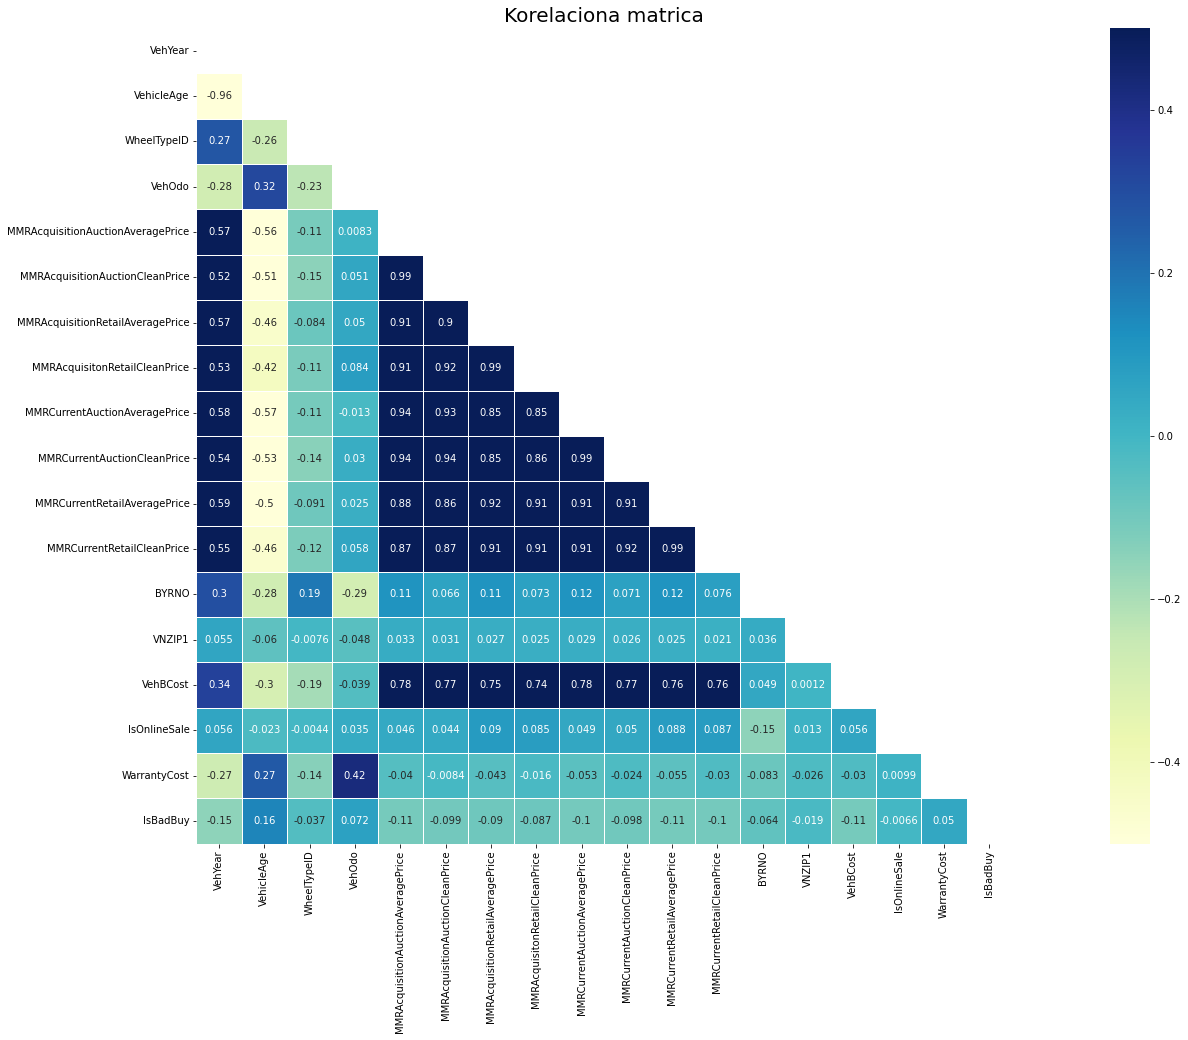

In [12]:
corr = data.select_dtypes(np.number).corr()
plt.figure(figsize=(35,15))
plt.title('Korelaciona matrica', fontsize=20)

sns.heatmap(corr,
            vmin=-.5, #sve preko 0.5 (ispod -0.5) ce biti predstavljeno kao srednja i visoka korelisanost
            vmax =.5,
            mask = np.triu(np.ones_like(corr, dtype=np.bool)),
            cmap = "YlGnBu",
            center=0,
            square=True,
            linewidths=.5,
            annot=True)

plt.show()

In [13]:
# Izbacujemo varijablu VehYear jer je u visokoj korelaciji sa varijablom VehicleAge
# WheelTypeID i BYRNO izbacujemo jer nemaju nikakvog znacaja za nasu analizu
# VNZIP1 smatramo da je beznacajan, a i ima slabu korelaciju sa svim promenljivim

In [14]:
data.drop(['VehYear', 'WheelTypeID', 'BYRNO', 'VNZIP1'], axis=1, inplace=True)

In [15]:
data

,PurchDate,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
RefId,,,,,,,,,,,,,,,,,,,,,,,,,
1,1/7/2009 0:12,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389,0
2,1/7/2009 0:12,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630,0
3,1/7/2009 0:12,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020,0
4,1/7/2009 0:12,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,WHITE,AUTO,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,3901.0,4908.0,6706.0,8577.0,4709.0,5827.0,8149.0,9451.0,5600.0,0,594,0
5,1/21/2009 0:12,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,Alloy,76173,AMERICAN,LARGE TRUCK,CHRYSLER,6407.0,8051.0,10378.0,12443.0,7159.0,8934.0,11135.0,12560.0,8800.0,0,920,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6794,1/18/2009 0:11,3,SUZUKI,FORENZA,NaN,4D SEDAN,RED,AUTO,Covers,60549,OTHER ASIAN,MEDIUM,OTHER,3905.0,4892.0,4717.0,5783.0,3556.0,4714.0,6629.0,8766.0,5600.0,0,533,0
6795,1/24/2009 0:11,4,JEEP,LIBERTY 4WD V6,Spo,4D SUV,RED,AUTO,Alloy,85377,AMERICAN,SMALL SUV,CHRYSLER,7104.0,8601.0,8172.0,9789.0,7536.0,8859.0,11223.0,12190.0,6600.0,0,983,0
6796,1/24/2009 0:11,7,CHEVROLET,TRAILBLAZER EXT 2WD,LT,4D SUV 4.2L LT,BEIGE,AUTO,Alloy,75700,AMERICAN,MEDIUM SUV,GM,5095.0,5988.0,6003.0,6967.0,5720.0,7185.0,8125.0,9754.0,7000.0,0,1455,0


In [16]:
#Nedostajuce vrednosti

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6798 entries, 1 to 6798
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          6798 non-null   object 
 1   VehicleAge                         6798 non-null   int64  
 2   Make                               6798 non-null   object 
 3   Model                              6798 non-null   object 
 4   Trim                               6566 non-null   object 
 5   SubModel                           6798 non-null   object 
 6   Color                              6798 non-null   object 
 7   Transmission                       6798 non-null   object 
 8   WheelType                          6459 non-null   object 
 9   VehOdo                             6798 non-null   int64  
 10  Nationality                        6797 non-null   object 
 11  Size                               6797 non-null   objec

In [18]:
# Trim ima 232 nedostajuce vrednosti
# WheelType ima 339 NA
# 10 - 16 jedna NA, proveri gde je i da li da se izbacuje ceo red
# 17 - 20 ima 21 NA

In [19]:
data.isna().sum()

PurchDate                              0
VehicleAge                             0
Make                                   0
Model                                  0
Trim                                 232
SubModel                               0
Color                                  0
Transmission                           0
WheelType                            339
VehOdo                                 0
Nationality                            1
Size                                   1
TopThreeAmericanName                   1
MMRAcquisitionAuctionAveragePrice      1
MMRAcquisitionAuctionCleanPrice        1
MMRAcquisitionRetailAveragePrice       1
MMRAcquisitonRetailCleanPrice          1
MMRCurrentAuctionAveragePrice         21
MMRCurrentAuctionCleanPrice           21
MMRCurrentRetailAveragePrice          21
MMRCurrentRetailCleanPrice            21
VehBCost                               0
IsOnlineSale                           0
WarrantyCost                           0
IsBadBuy        

In [20]:
data.loc[data['Nationality'].isna(),:]
# Proverile smo da li je mozda jedna NA za 6 varijabli u istom redu, posto smo videle da nije, nastavljamo dalje sa izbacivanjem

,PurchDate,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
RefId,,,,,,,,,,,,,,,,,,,,,,,,,
6496,1/24/2010 0:02,2,JEEP,PATRIOT 2WD 4C,Spo,4D SUV SPORT,BLACK,AUTO,Covers,61596,NaN,NaN,NaN,8759.0,9966.0,13397.0,14222.0,10159.0,11695.0,14026.0,15410.0,9955.0,0,825,0


In [21]:
# Trim

In [22]:
data['Trim'].value_counts()

Bas    1316
LS      921
SE      859
SXT     338
LT      318
       ... 
RT        1
Max       1
Ove       1
ZTW       1
ZX2       1
Name: Trim, Length: 104, dtype: int64

In [23]:
# Posto vidimo da imamo 104 razlicitih vrednosti i da dosta njih imaju frekvenciju 1, kako bismo sprecili
# pretreniranost modela, izbacicemo ovu varijablu

In [24]:
data = data.drop('Trim',axis=1)

In [25]:
# WheelType

In [26]:
data['WheelType'].value_counts()

Alloy     3376
Covers    3083
Name: WheelType, dtype: int64

In [27]:
# Dominantna kategorija ove varijable je Alloy, tako da cemo nedostajuce vrednosti zameniti njom

In [28]:
data.loc[data['WheelType'].isna(),'WheelType'] = 'Alloy'

In [29]:
# 'Nationality' i 'Make' 

In [30]:
pd.crosstab(data['Make'], data['Nationality'])

Nationality,AMERICAN,OTHER,OTHER ASIAN,TOP LINE ASIAN
Make,,,,
ACURA,0,0,4,0
BUICK,63,0,0,0
CADILLAC,1,0,0,0
CHEVROLET,1574,0,0,0
CHRYSLER,827,0,0,0
DODGE,1187,0,0,0
FORD,1059,0,0,0
GMC,61,0,0,0
HONDA,0,0,0,52


In [31]:
# Zakljucujemo da su ove dve varijable visoko korelisane, a i da za Ameriku imamo mnogo vise podataka u odnosu na npr Others
# pa cemo iz tog razloga izbaciti Nationality

In [32]:
data = data.drop('Nationality',axis=1)

In [33]:
# Size

In [34]:
data['Size'].value_counts()

MEDIUM         2888
LARGE           786
MEDIUM SUV      760
COMPACT         629
VAN             550
LARGE TRUCK     323
SMALL SUV       221
CROSSOVER       174
SPECIALTY       169
LARGE SUV       134
SMALL TRUCK      90
SPORTS           73
Name: Size, dtype: int64

In [35]:
# Vidimo da je dominantna kategorija MEDIUM, pa cemo nedostajucu vrednost popuniti njom

In [36]:
data.loc[data['Size'].isna(),'Size'] = 'MEDIUM'

In [37]:
# TopThreeAmericanName

In [38]:
data['TopThreeAmericanName'].value_counts()

GM          2328
CHRYSLER    2164
OTHER       1158
FORD        1147
Name: TopThreeAmericanName, dtype: int64

In [39]:
# Vidimo da je dominantna kategorija GM, pa cemo nedostajucu vrednost popuniti njom

In [40]:
data.loc[data['TopThreeAmericanName'].isna(),'TopThreeAmericanName'] = 'GM'

In [41]:
# Provericemo da li je nedostajuca vrednost isti red, pa ako jeste, izbacicemo tu opservaciju

In [42]:
data.loc[data['MMRAcquisitionAuctionAveragePrice'].isna(),:]

,PurchDate,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelType,VehOdo,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
RefId,,,,,,,,,,,,,,,,,,,,,,,
530,1/13/2010 0:07,6,NISSAN,TITAN PICKUP 2WD V8,EXT CAB 5.6L,WHITE,AUTO,Alloy,74705,LARGE TRUCK,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10440.0,0,1272,0


In [43]:
data = data.drop(530)

In [44]:
data.iloc[525:535, :]

,PurchDate,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelType,VehOdo,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
RefId,,,,,,,,,,,,,,,,,,,,,,,
526,1/12/2010 0:07,6,CHEVROLET,MALIBU V6,4D SEDAN,WHITE,AUTO,Covers,53861,MEDIUM,GM,5729.0,7254.0,8739.0,9945.0,3353.0,4262.0,6796.0,7862.0,5500.0,0,1003,0
527,1/12/2010 0:07,4,DODGE,STRATUS V6,4D SEDAN SXT FFV,SILVER,AUTO,Covers,58329,MEDIUM,CHRYSLER,6233.0,7042.0,9421.0,10039.0,6210.0,7125.0,9566.0,10887.0,6100.0,0,1086,0
528,1/12/2010 0:07,4,DODGE,STRATUS V6,4D SEDAN SXT FFV,SILVER,AUTO,Covers,48151,MEDIUM,CHRYSLER,6233.0,7042.0,9421.0,10039.0,6069.0,6991.0,9313.0,10627.0,5500.0,0,975,0
529,1/13/2010 0:07,6,DODGE,1500 RAM PICKUP 2WD,QUAD CAB 4.7L SLT,WHITE,AUTO,Alloy,77465,LARGE TRUCK,CHRYSLER,6462.0,8081.0,10473.0,12287.0,6786.0,8661.0,10964.0,12882.0,10225.0,0,920,0
531,1/23/2010 0:07,3,CHEVROLET,IMPALA,4D SEDAN LS,WHITE,AUTO,Covers,40651,LARGE,GM,8015.0,9075.0,11537.0,12866.0,8186.0,9279.0,11674.0,12864.0,8200.0,0,1328,0
532,1/23/2010 0:07,4,DODGE,STRATUS V6,4D SEDAN SXT FFV,WHITE,AUTO,Covers,36198,MEDIUM,CHRYSLER,6263.0,7044.0,9366.0,10083.0,6069.0,6991.0,9313.0,10627.0,5700.0,0,882,0
533,1/19/2010 0:10,3,CHEVROLET,HHR,4D SUV 2.2L LS,GOLD,AUTO,Covers,67128,MEDIUM,GM,6228.0,7320.0,9782.0,11721.0,5877.0,7124.0,9180.0,10967.0,7215.0,0,728,0
534,1/19/2010 0:10,3,FORD,FIVE HUNDRED,4D SEDAN SEL,WHITE,AUTO,Alloy,73905,LARGE,FORD,7701.0,9486.0,11407.0,13276.0,6974.0,8315.0,10609.0,12191.0,7615.0,0,1506,0
535,1/26/2010 0:10,4,DODGE,1500 RAM PICKUP 2WD,REG CAB 4.7L,WHITE,AUTO,Covers,82142,LARGE TRUCK,CHRYSLER,5339.0,6341.0,9993.0,11038.0,5102.0,6144.0,10062.0,11019.0,7170.0,0,983,0


In [45]:
data.isna().sum()

PurchDate                             0
VehicleAge                            0
Make                                  0
Model                                 0
SubModel                              0
Color                                 0
Transmission                          0
WheelType                             0
VehOdo                                0
Size                                  0
TopThreeAmericanName                  0
MMRAcquisitionAuctionAveragePrice     0
MMRAcquisitionAuctionCleanPrice       0
MMRAcquisitionRetailAveragePrice      0
MMRAcquisitonRetailCleanPrice         0
MMRCurrentAuctionAveragePrice        20
MMRCurrentAuctionCleanPrice          20
MMRCurrentRetailAveragePrice         20
MMRCurrentRetailCleanPrice           20
VehBCost                              0
IsOnlineSale                          0
WarrantyCost                          0
IsBadBuy                              0
dtype: int64

In [46]:
# Sredjivanje MMR varijabli

<AxesSubplot:>

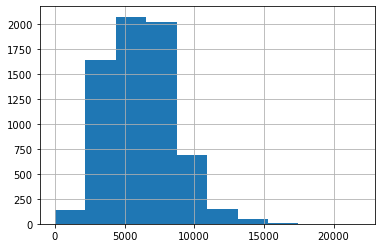

In [47]:
data['MMRCurrentAuctionAveragePrice'].hist()

In [48]:
import scipy

In [49]:
scipy.stats.shapiro(data.loc[data['MMRCurrentAuctionAveragePrice'].isna()==False,'MMRCurrentAuctionAveragePrice'])

ShapiroResult(statistic=0.9828617572784424, pvalue=7.471559996850242e-28)

<AxesSubplot:>

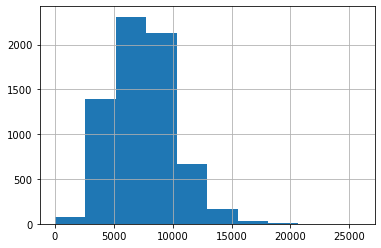

In [50]:
data['MMRCurrentAuctionCleanPrice'].hist()

In [51]:
scipy.stats.shapiro(data.loc[data['MMRCurrentAuctionCleanPrice'].isna()==False,'MMRCurrentAuctionCleanPrice'])

ShapiroResult(statistic=0.9819827079772949, pvalue=1.7330095418579664e-28)

<AxesSubplot:>

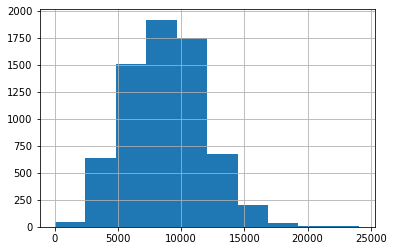

In [52]:
data['MMRCurrentRetailAveragePrice'].hist()

In [53]:
scipy.stats.shapiro(data.loc[data['MMRCurrentRetailAveragePrice'].isna()==False,'MMRCurrentRetailAveragePrice'])

ShapiroResult(statistic=0.9944936633110046, pvalue=1.776779932357404e-15)

<AxesSubplot:>

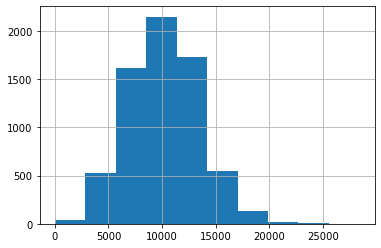

In [54]:
data['MMRCurrentRetailCleanPrice'].hist()

In [55]:
scipy.stats.shapiro(data.loc[data['MMRCurrentRetailCleanPrice'].isna()==False,'MMRCurrentRetailCleanPrice'])

ShapiroResult(statistic=0.9937793612480164, pvalue=1.276671616205527e-16)

In [56]:
# na osnovu histograma, pretpostavile smo da nijedna varijabla nema N raspodelu, ali kako bismo potvrdile
# uradile smo i Shapiro Wilk test i utvrdile da nemaju, tako da cemo nedostajuce vrednosti popuniti medijanom

In [57]:
data['MMRCurrentAuctionAveragePrice'] = data['MMRCurrentAuctionAveragePrice'].fillna(data['MMRCurrentAuctionAveragePrice'].median())
data['MMRCurrentAuctionCleanPrice'] = data['MMRCurrentAuctionCleanPrice'].fillna(data['MMRCurrentAuctionCleanPrice'].median())
data['MMRCurrentRetailAveragePrice'] = data['MMRCurrentRetailAveragePrice'].fillna(data['MMRCurrentRetailAveragePrice'].median())
data['MMRCurrentRetailCleanPrice'] = data['MMRCurrentRetailCleanPrice'].fillna(data['MMRCurrentRetailCleanPrice'].median())

In [58]:
data.isna().sum()

PurchDate                            0
VehicleAge                           0
Make                                 0
Model                                0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
IsBadBuy                             0
dtype: int64

In [59]:
# Sada je nas dataset sredjen i nemamo nedostajuce vrednosti, pa mozemo nastaviti sa daljom analizom

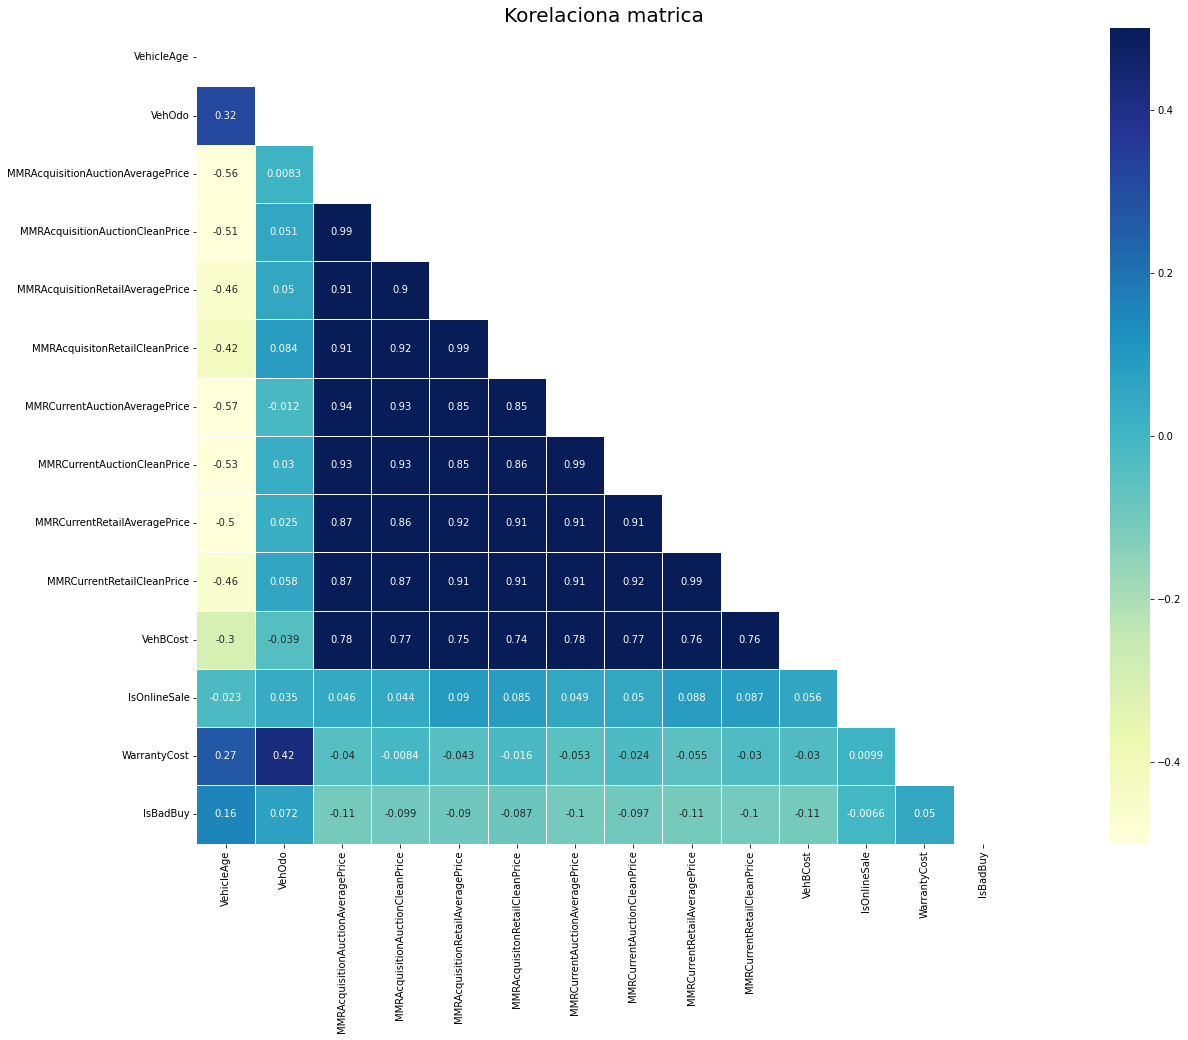

In [60]:
corr = data.select_dtypes(np.number).corr()
plt.figure(figsize=(35,15))
plt.title('Korelaciona matrica', fontsize=20)

sns.heatmap(corr,
            vmin=-.5, #sve preko 0.5 (ispod -0.5) ce biti predstavljeno kao srednja i visoka korelisanost
            vmax =.5,
            mask = np.triu(np.ones_like(corr, dtype=np.bool)),
            cmap = "YlGnBu",
            center=0,
            square=True,
            linewidths=.5,
            annot=True)

plt.show()

In [61]:
pd.crosstab(data['Make'], data['TopThreeAmericanName'])

TopThreeAmericanName,CHRYSLER,FORD,GM,OTHER
Make,,,,
ACURA,0,0,0,4
BUICK,0,0,63,0
CADILLAC,0,0,1,0
CHEVROLET,0,0,1574,0
CHRYSLER,827,0,0,0
DODGE,1187,0,0,0
FORD,0,1059,0,0
GMC,0,0,61,0
HONDA,0,0,0,52


In [62]:
# TopThreeAmericanName je takodje u visokoj korelaciji sa Make, tako da cemo i tu varijablu iskljuciti iz dalje analize

In [63]:
data = data.drop('TopThreeAmericanName',axis=1)

In [64]:
data.head()

,PurchDate,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelType,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
RefId,,,,,,,,,,,,,,,,,,,,,,
1,1/7/2009 0:12,4,DODGE,STRATUS V6,4D SEDAN SXT FFV,MAROON,AUTO,Covers,73807,MEDIUM,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389,0
2,1/7/2009 0:12,5,DODGE,NEON,4D SEDAN,SILVER,AUTO,Alloy,65617,COMPACT,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630,0
3,1/7/2009 0:12,4,FORD,FOCUS,2D COUPE ZX3,SILVER,MANUAL,Covers,69367,COMPACT,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020,0
4,1/7/2009 0:12,5,MITSUBISHI,GALANT 4C,4D SEDAN ES,WHITE,AUTO,Covers,81054,MEDIUM,3901.0,4908.0,6706.0,8577.0,4709.0,5827.0,8149.0,9451.0,5600.0,0,594,0
5,1/21/2009 0:12,5,DODGE,1500 RAM PICKUP 2WD,QUAD CAB 4.7L SLT,WHITE,AUTO,Alloy,76173,LARGE TRUCK,6407.0,8051.0,10378.0,12443.0,7159.0,8934.0,11135.0,12560.0,8800.0,0,920,0


In [65]:
# Analiza ostalih atributa

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6797 entries, 1 to 6798
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          6797 non-null   object 
 1   VehicleAge                         6797 non-null   int64  
 2   Make                               6797 non-null   object 
 3   Model                              6797 non-null   object 
 4   SubModel                           6797 non-null   object 
 5   Color                              6797 non-null   object 
 6   Transmission                       6797 non-null   object 
 7   WheelType                          6797 non-null   object 
 8   VehOdo                             6797 non-null   int64  
 9   Size                               6797 non-null   object 
 10  MMRAcquisitionAuctionAveragePrice  6797 non-null   float64
 11  MMRAcquisitionAuctionCleanPrice    6797 non-null   float

In [67]:
# Purchdate

In [68]:
data['PurchDate'].value_counts()

1/30/2010 0:09    42
1/25/2009 0:02    41
1/20/2010 0:10    40
1/4/2009 0:03     36
1/8/2010 0:12     36
                  ..
1/16/2009 0:01     1
1/26/2010 0:03     1
1/19/2010 0:04     1
1/27/2010 0:09     1
1/25/2009 0:05     1
Name: PurchDate, Length: 503, dtype: int64

In [69]:
# Za nasu analizu znacajna nam je godina aukcije, tako da cemo napraviti novu varijablu gde cemo iz ove izvuci samo godinu

In [70]:
data['PurchYear'] = pd.DatetimeIndex(data['PurchDate']).year

In [71]:
data = data.drop('PurchDate',axis=1)

In [72]:
data['PurchYear'].value_counts()

2010    3504
2009    3293
Name: PurchYear, dtype: int64

In [73]:
# Vidimo da imamo samo dve godine i da je broj opservacija priblizno isti za obe, pa cemo sada proveriti kakva je razlika
# u odnosu na izlaznu varijablu

<AxesSubplot:xlabel='PurchYear', ylabel='count'>

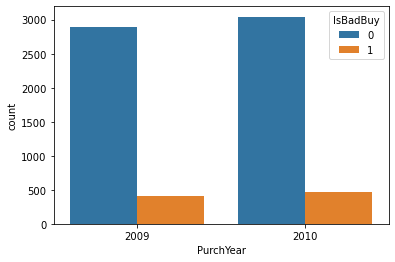

In [74]:
sns.countplot(x='PurchYear', hue='IsBadBuy', data=data)

In [75]:
# Zakljucujemo da ne postoji znacajna razlika u kvalitetu kupovine u odnosu na ove dve godine, ali ce nam kombinacija
# ovog atributa sa nekim drugim mozda dati bolje rezultate, tako da cemo je za sada ostaviti u datasetu

In [76]:
# VehicleAge

In [77]:
data['VehicleAge'].value_counts()

4    1588
3    1453
5    1214
2     792
6     753
7     429
1     295
8     207
9      66
Name: VehicleAge, dtype: int64

<AxesSubplot:xlabel='VehicleAge', ylabel='count'>

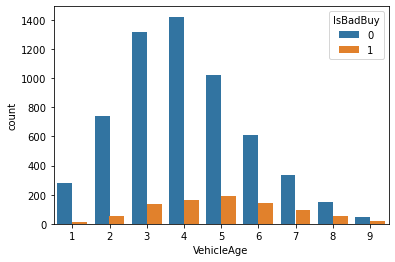

In [78]:
sns.countplot(x='VehicleAge', hue='IsBadBuy', data=data)

In [79]:
# Vidimo da razlicita starost vozila ima drugaciji uticaj na kupovinu, pa mozemo da zakljucimo da nam je ovaj atribut
# znacajan za dalju analizu

In [80]:
# Make

In [81]:
data['Make'].value_counts()

CHEVROLET     1574
DODGE         1187
FORD          1059
CHRYSLER       827
PONTIAC        395
KIA            232
SATURN         211
NISSAN         194
HYUNDAI        181
JEEP           150
SUZUKI         132
MAZDA          112
TOYOTA         109
MITSUBISHI      97
MERCURY         81
BUICK           63
GMC             61
HONDA           52
OLDSMOBILE      22
VOLKSWAGEN      14
ISUZU            8
LINCOLN          7
INFINITI         6
MINI             5
SCION            5
VOLVO            4
ACURA            4
SUBARU           1
CADILLAC         1
HUMMER           1
PLYMOUTH         1
LEXUS            1
Name: Make, dtype: int64

In [82]:
# Model

In [83]:
data['Model'].value_counts()

PT CRUISER              216
IMPALA                  194
TAURUS                  128
CARAVAN GRAND FWD V6    118
CALIBER                 117
                       ... 
CAMRY V6 3.0L / 3.3L      1
MARINER 2WD 4C            1
SILHOUETTE                1
VERONA                    1
PATRIOT 2WD 4C 2.0L       1
Name: Model, Length: 632, dtype: int64

In [84]:
pd.crosstab(data['Model'], data['SubModel']).sum()

SubModel
2D CONVERTIBLE             30
2D CONVERTIBLE GLS          1
2D CONVERTIBLE GTC          2
2D CONVERTIBLE TOURING      7
2D COUPE                  102
                         ... 
WAGON 3.5L                  2
WAGON 3.5L SXT              3
WAGON DX                    1
WAGON LX                    1
WAGON R/T                   1
Length: 465, dtype: int64

In [85]:
# Vidimo da za oba varijable imamo veliki broj razlicitih vrednosti, pa cemo obe varijable iskljuciti iz dalje analize

In [86]:
data.drop(['Model', 'SubModel'], axis=1, inplace=True)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6797 entries, 1 to 6798
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   VehicleAge                         6797 non-null   int64  
 1   Make                               6797 non-null   object 
 2   Color                              6797 non-null   object 
 3   Transmission                       6797 non-null   object 
 4   WheelType                          6797 non-null   object 
 5   VehOdo                             6797 non-null   int64  
 6   Size                               6797 non-null   object 
 7   MMRAcquisitionAuctionAveragePrice  6797 non-null   float64
 8   MMRAcquisitionAuctionCleanPrice    6797 non-null   float64
 9   MMRAcquisitionRetailAveragePrice   6797 non-null   float64
 10  MMRAcquisitonRetailCleanPrice      6797 non-null   float64
 11  MMRCurrentAuctionAveragePrice      6797 non-null   float

In [88]:
# Color 

In [89]:
data['Color'].value_counts()

SILVER       1379
WHITE        1118
BLUE          930
BLACK         735
GREY          710
RED           570
GOLD          504
GREEN         297
MAROON        210
BEIGE         170
BROWN          52
PURPLE         32
ORANGE         29
YELLOW         28
OTHER          28
NOT AVAIL       5
Name: Color, dtype: int64

<AxesSubplot:xlabel='VehicleAge', ylabel='count'>

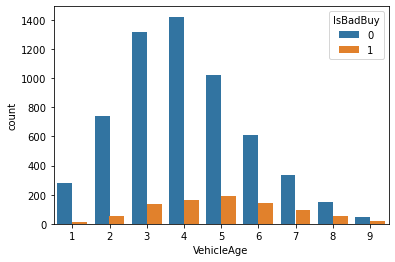

In [90]:
sns.countplot(x='VehicleAge', hue='IsBadBuy', data=data)

In [91]:
data.loc[data['Color'] == 'NOT AVAIL','Color']

RefId
2918    NOT AVAIL
4072    NOT AVAIL
4160    NOT AVAIL
4910    NOT AVAIL
4912    NOT AVAIL
Name: Color, dtype: object

In [92]:
# Vidimo da za 5 opservacija imamo vrednost not avail, sto moramo zameniti
# Medjutim, necemo menjati najzastupljenijom bojom, vec cemo im dodeliti vrednost other  

In [93]:
data.loc[data['Color'] == 'NOT AVAIL','Color'] = 'OTHER'

In [94]:
# Transmission

In [95]:
data['Transmission'].value_counts()

AUTO      6546
MANUAL     251
Name: Transmission, dtype: int64

<AxesSubplot:xlabel='Transmission', ylabel='count'>

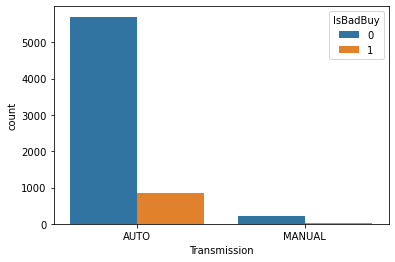

In [96]:
sns.countplot(x='Transmission', hue='IsBadBuy', data=data)

In [97]:
#Zbog velike razlike u broju opservacija koje pripadaju ovim kategorijama, na osnovu ovog dijagrama ne mozemo jasno da 
#utvrdimo da li ima znacajne razlike izmedju automatika i manuala, pa cemo izraziti procentualno

In [98]:
dataTrans = data.groupby('Transmission')['IsBadBuy'].value_counts(normalize=True)
dataTrans = dataTrans.mul(100)
dataTrans = dataTrans.rename('percent').reset_index()

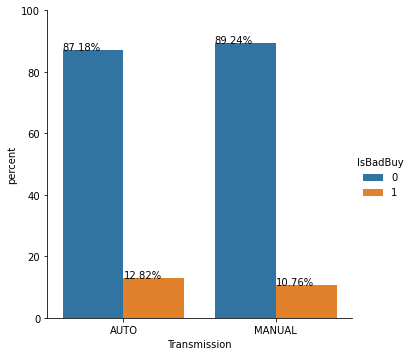

In [99]:
g = sns.catplot(x='Transmission', y='percent', hue='IsBadBuy', kind='bar', data=dataTrans)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [100]:
# Uocavamo da ne postoji znacajna razlika izmedju kvaliteta kupovine u zavisnosti od kategorije kojoj vozilo pripada,
#ali ce mozda ovaj atribut biti znacajan u kombinaciji sa nekim drugim pa ga zato za sada ostavljamo u analizi

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6797 entries, 1 to 6798
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   VehicleAge                         6797 non-null   int64  
 1   Make                               6797 non-null   object 
 2   Color                              6797 non-null   object 
 3   Transmission                       6797 non-null   object 
 4   WheelType                          6797 non-null   object 
 5   VehOdo                             6797 non-null   int64  
 6   Size                               6797 non-null   object 
 7   MMRAcquisitionAuctionAveragePrice  6797 non-null   float64
 8   MMRAcquisitionAuctionCleanPrice    6797 non-null   float64
 9   MMRAcquisitionRetailAveragePrice   6797 non-null   float64
 10  MMRAcquisitonRetailCleanPrice      6797 non-null   float64
 11  MMRCurrentAuctionAveragePrice      6797 non-null   float

In [102]:
#WheelType

In [103]:
data['WheelType'].value_counts()

Alloy     3714
Covers    3083
Name: WheelType, dtype: int64

<AxesSubplot:xlabel='WheelType', ylabel='count'>

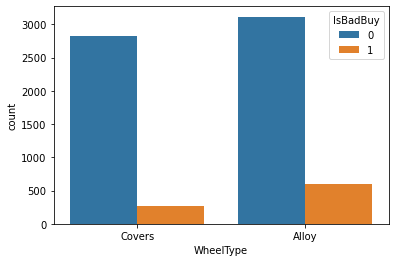

In [104]:
sns.countplot(x='WheelType', hue='IsBadBuy', data=data)

In [105]:
# Kao i prethodna, ostavicemo je

In [106]:
data['IsBadBuy'].value_counts()

0    5931
1     866
Name: IsBadBuy, dtype: int64

In [107]:
# Vidimo da izlazna varijabla ima nebalansirane klase, sto je lose, resicemo

In [108]:
#Size

In [109]:
data['Size'].value_counts()

MEDIUM         2889
LARGE           786
MEDIUM SUV      760
COMPACT         629
VAN             550
LARGE TRUCK     322
SMALL SUV       221
CROSSOVER       174
SPECIALTY       169
LARGE SUV       134
SMALL TRUCK      90
SPORTS           73
Name: Size, dtype: int64

In [110]:
kolone = ['PurchYear', 'VehicleAge', 'Make', 'Color', 'Transmission', 'WheelType', 
                   'VehOdo', 'Size', 'MMRAcquisitionAuctionAveragePrice', 
                   'MMRAcquisitionRetailAveragePrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice', 
                   'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'IsBadBuy']
data_prosek = data[kolone]

In [111]:
# Posto vidimo da su MMR vrednosti u visokoj korelaciji, napravicemo data set gde cemo izbaciti 4 varijable koje se odnose
# na cenu automobila koji je u natprosecnom stanju, pa cemo testirati na oba data seta (sa i bez) i videti sta je bolje

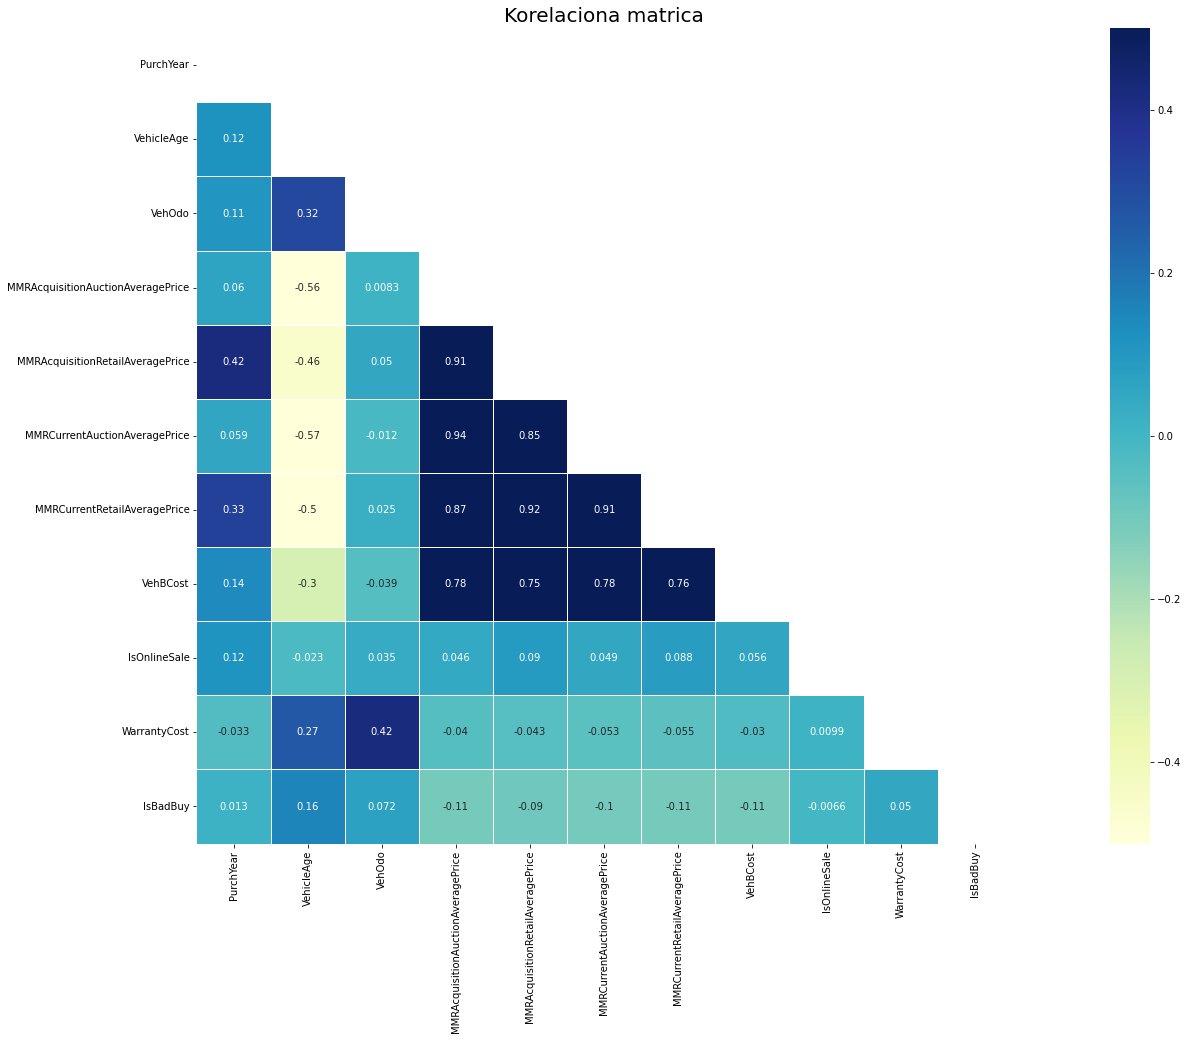

In [112]:
corr = data_prosek.select_dtypes(np.number).corr()
plt.figure(figsize=(35,15))
plt.title('Korelaciona matrica', fontsize=20)

sns.heatmap(corr,
            vmin=-.5, #sve preko 0.5 (ispod -0.5) ce biti predstavljeno kao srednja i visoka korelisanost
            vmax =.5,
            mask = np.triu(np.ones_like(corr, dtype=np.bool)),
            cmap = "YlGnBu",
            center=0,
            square=True,
            linewidths=.5,
            annot=True)

plt.show()

In [113]:
# I dalje vidimo da imamo jako korelisane atribute, ali smatramo da su znacajni za dalju analizu, pa ih ostavljamo

In [114]:
# IsOnlineSale                       

In [115]:
data['IsOnlineSale'].value_counts()

0    6613
1     184
Name: IsOnlineSale, dtype: int64

In [116]:
# Vidimo da velika vecina pripada klasi da nije online, tako da cemo je izbaciti iz dalje analize

In [117]:
data = data.drop("IsOnlineSale",axis=1)

In [118]:
data_prosek = data_prosek.drop("IsOnlineSale",axis=1)

In [119]:
### Kvantifikacija kategorickih atributa ###

In [120]:
# Gde imamo samo dve kategorije, dodelicemo binarne vrednosti, a za varijable sa vise kategorija radimo dummy

In [121]:
# Izabrale smo da radimo sa data.prosek pa cemo videti rezultate na kraju i odluciti da li je bio dobar izbor ili menjamo

In [122]:
data_prosek = data_prosek.replace({'Transmission' : {'MANUAL':0, 'AUTO':1}})
data_prosek = data_prosek.replace({'WheelType' : {'Covers':0, 'Alloy':1}})

In [123]:
data_prosek = pd.get_dummies(data_prosek, columns = ['Make', 'Color', 'Size'])
data_prosek

,PurchYear,VehicleAge,Transmission,WheelType,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VehBCost,WarrantyCost,IsBadBuy,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,...,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN
RefId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2009,4,1,0,73807,3202.0,6943.0,4035.0,7146.0,4900.0,1389,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2009,5,1,1,65617,1893.0,4658.0,1844.0,4375.0,4100.0,630,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2009,4,0,0,69367,3913.0,7723.0,3247.0,6739.0,4000.0,1020,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2009,5,1,0,81054,3901.0,6706.0,4709.0,8149.0,5600.0,594,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,2009,5,1,1,76173,6407.0,10378.0,7159.0,11135.0,8800.0,920,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6794,2009,3,1,0,60549,3905.0,4717.0,3556.0,6629.0,5600.0,533,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6795,2009,4,1,1,85377,7104.0,8172.0,7536.0,11223.0,6600.0,983,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6796,2009,7,1,1,75700,5095.0,6003.0,5720.0,8125.0,7000.0,1455,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [124]:
# Delimo dataset na izlaznu i ostale promenljive

In [125]:
data_prosek['IsBadBuy'] = data_prosek['IsBadBuy'].astype('object')

In [126]:
x = data_prosek.loc[:, data_prosek.columns != 'IsBadBuy']
y = data_prosek.loc[:, 'IsBadBuy']

In [127]:
x.head()
y.dtypes

dtype('O')

In [128]:
selection = VarianceThreshold(0.05)
selection.fit(x)
x_filter = x.loc[:, selection.get_support()]

In [129]:
x_filter

,PurchYear,VehicleAge,WheelType,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VehBCost,WarrantyCost,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_PONTIAC,Color_BLACK,Color_BLUE,Color_GOLD,Color_GREY,Color_RED,Color_SILVER,Color_WHITE,Size_COMPACT,Size_LARGE,Size_MEDIUM,Size_MEDIUM SUV,Size_VAN
RefId,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2009,4,0,73807,3202.0,6943.0,4035.0,7146.0,4900.0,1389,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2009,5,1,65617,1893.0,4658.0,1844.0,4375.0,4100.0,630,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,2009,4,0,69367,3913.0,7723.0,3247.0,6739.0,4000.0,1020,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,2009,5,0,81054,3901.0,6706.0,4709.0,8149.0,5600.0,594,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5,2009,5,1,76173,6407.0,10378.0,7159.0,11135.0,8800.0,920,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6794,2009,3,0,60549,3905.0,4717.0,3556.0,6629.0,5600.0,533,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6795,2009,4,1,85377,7104.0,8172.0,7536.0,11223.0,6600.0,983,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6796,2009,7,1,75700,5095.0,6003.0,5720.0,8125.0,7000.0,1455,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [130]:
# Vidimo da smo uspeli da smanjimo broj varijabli sa 70 na 27, sto znaci da je dosta njih bilo beznacajno za nasu analizu

In [131]:
# Sredjivanje autlajera

In [132]:
data_prosek.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6797 entries, 1 to 6798
Data columns (total 71 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchYear                          6797 non-null   int64  
 1   VehicleAge                         6797 non-null   int64  
 2   Transmission                       6797 non-null   int64  
 3   WheelType                          6797 non-null   int64  
 4   VehOdo                             6797 non-null   int64  
 5   MMRAcquisitionAuctionAveragePrice  6797 non-null   float64
 6   MMRAcquisitionRetailAveragePrice   6797 non-null   float64
 7   MMRCurrentAuctionAveragePrice      6797 non-null   float64
 8   MMRCurrentRetailAveragePrice       6797 non-null   float64
 9   VehBCost                           6797 non-null   float64
 10  WarrantyCost                       6797 non-null   int64  
 11  IsBadBuy                           6797 non-null   objec

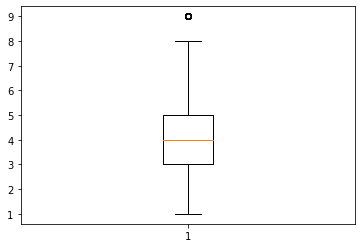

In [133]:
plt.boxplot(data_prosek['VehicleAge'])
plt.show()

In [134]:
Q1 = data_prosek['VehicleAge'].quantile(0.25)
Q3 = data_prosek['VehicleAge'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data_prosek['VehicleAge'][((data_prosek['VehicleAge'] < (Q1 - 1.5 * IQR)) |(data_prosek['VehicleAge'] > (Q3 + 1.5 * IQR)))]
IQR_outliers

RefId
129     9
134     9
154     9
577     9
784     9
       ..
6436    9
6545    9
6602    9
6697    9
6717    9
Name: VehicleAge, Length: 66, dtype: int64

In [135]:
data_prosek.loc[data_prosek['VehicleAge'] > (Q3 + 1.5 * IQR), 'VehicleAge'] = (Q3 + 1.5 * IQR)

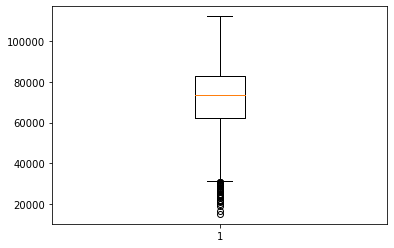

In [136]:
plt.boxplot(data_prosek['VehOdo'])
plt.show()

In [137]:
Q1 = data_prosek['VehOdo'].quantile(0.25)
Q3 = data_prosek['VehOdo'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data_prosek['VehOdo'][((data_prosek['VehOdo'] < (Q1 - 1.5 * IQR)) |(data_prosek['VehOdo'] > (Q3 + 1.5 * IQR)))]
IQR_outliers

RefId
42      25830
454     27504
459     19983
598     24186
619     30259
698     30128
825     21814
936     28802
1471    27815
1777    26524
1779    31118
1782    16574
2243    24805
2540    23144
2630    29314
3010    15249
3047    30584
3223    29084
3265    30807
3364    21459
3366    30553
3383    27281
3820    23376
4475    27115
5027    19070
5028    26811
5123    30868
5260    24481
5293    29431
5294    29335
5304    22241
5474    21158
5917    28184
6208    24735
6300    26625
6385    26660
6426    27247
6599    27308
Name: VehOdo, dtype: int64

In [138]:
data_prosek.loc[data_prosek['VehOdo'] < (Q1 - 1.5 * IQR), 'VehOdo'] = (Q1 - 1.5 * IQR)

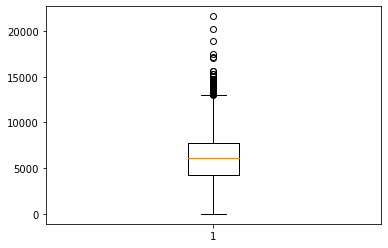

In [139]:
plt.boxplot(data_prosek['MMRAcquisitionAuctionAveragePrice'])
plt.show()

In [140]:
Q1 = data_prosek['MMRAcquisitionAuctionAveragePrice'].quantile(0.25)
Q3 = data_prosek['MMRAcquisitionAuctionAveragePrice'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data_prosek['MMRAcquisitionAuctionAveragePrice'][((data_prosek['MMRAcquisitionAuctionAveragePrice'] < (Q1 - 1.5 * IQR)) |(data_prosek['MMRAcquisitionAuctionAveragePrice'] > (Q3 + 1.5 * IQR)))]
IQR_outliers

RefId
43      17110.0
216     13194.0
398     13572.0
729     13030.0
842     13106.0
         ...   
6048    13940.0
6224    13670.0
6294    15599.0
6353    14467.0
6607    13150.0
Name: MMRAcquisitionAuctionAveragePrice, Length: 53, dtype: float64

In [141]:
data_prosek.loc[data_prosek['MMRAcquisitionAuctionAveragePrice'] > (Q3 + 1.5 * IQR), 'MMRAcquisitionAuctionAveragePrice'] = (Q3 + 1.5 * IQR)

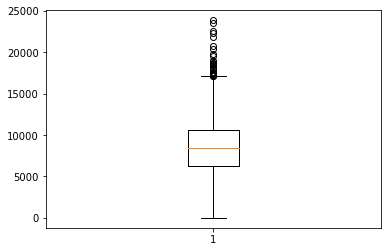

In [142]:
plt.boxplot(data_prosek['MMRAcquisitionRetailAveragePrice'])
plt.show()

In [143]:
Q1 = data_prosek['MMRAcquisitionRetailAveragePrice'].quantile(0.25)
Q3 = data_prosek['MMRAcquisitionRetailAveragePrice'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data_prosek['MMRAcquisitionRetailAveragePrice'][((data_prosek['MMRAcquisitionRetailAveragePrice'] < (Q1 - 1.5 * IQR)) |(data_prosek['MMRAcquisitionRetailAveragePrice'] > (Q3 + 1.5 * IQR)))]
IQR_outliers

RefId
9       17400.0
43      21858.0
398     17365.0
1047    17321.0
1053    17131.0
1088    19736.0
1108    22536.0
1192    18495.0
1547    18555.0
1784    18910.0
2160    18658.0
2485    17121.0
2524    17408.0
2626    18275.0
3070    23840.0
3408    18907.0
3419    22357.0
3487    18073.0
3870    18515.0
4386    20737.0
4836    17195.0
4892    17301.0
4894    23456.0
5173    17327.0
5532    17608.0
5533    18131.0
5617    20371.0
6046    17526.0
6048    19560.0
6071    17266.0
6224    17986.0
6294    17347.0
6353    18611.0
6607    17516.0
Name: MMRAcquisitionRetailAveragePrice, dtype: float64

In [144]:
data_prosek.loc[data_prosek['MMRAcquisitionRetailAveragePrice'] > (Q3 + 1.5 * IQR), 'MMRAcquisitionRetailAveragePrice'] = (Q3 + 1.5 * IQR)

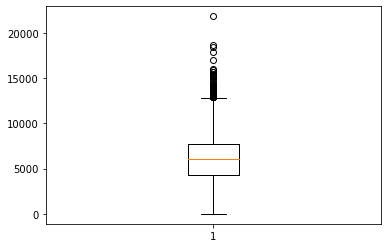

In [145]:
plt.boxplot(data_prosek['MMRCurrentAuctionAveragePrice'])
plt.show()

In [146]:
Q1 = data_prosek['MMRCurrentAuctionAveragePrice'].quantile(0.25)
Q3 = data_prosek['MMRCurrentAuctionAveragePrice'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data_prosek['MMRCurrentAuctionAveragePrice'][((data_prosek['MMRCurrentAuctionAveragePrice'] < (Q1 - 1.5 * IQR)) |(data_prosek['MMRCurrentAuctionAveragePrice'] > (Q3 + 1.5 * IQR)))]
IQR_outliers

RefId
43      16043.0
216     13278.0
342     12942.0
398     13256.0
655     12958.0
         ...   
6296    13237.0
6464    13938.0
6472    13717.0
6607    13277.0
6797    13646.0
Name: MMRCurrentAuctionAveragePrice, Length: 71, dtype: float64

In [147]:
data_prosek.loc[data_prosek['MMRCurrentAuctionAveragePrice'] > (Q3 + 1.5 * IQR), 'MMRCurrentAuctionAveragePrice'] = (Q3 + 1.5 * IQR)

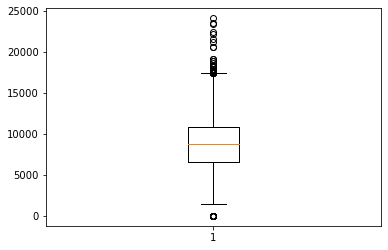

In [148]:
plt.boxplot(data_prosek['MMRCurrentRetailAveragePrice'])
plt.show()

In [149]:
Q1 = data_prosek['MMRCurrentRetailAveragePrice'].quantile(0.25)
Q3 = data_prosek['MMRCurrentRetailAveragePrice'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data_prosek['MMRCurrentRetailAveragePrice'][((data_prosek['MMRCurrentRetailAveragePrice'] < (Q1 - 1.5 * IQR)) |(data_prosek['MMRCurrentRetailAveragePrice'] > (Q3 + 1.5 * IQR)))]
IQR_outliers

RefId
43      20551.0
118         0.0
183         0.0
260         0.0
556         0.0
         ...   
6296    17444.0
6607    17488.0
6627        0.0
6684        0.0
6797    17619.0
Name: MMRCurrentRetailAveragePrice, Length: 71, dtype: float64

In [150]:
data_prosek.loc[data_prosek['MMRCurrentRetailAveragePrice'] > (Q3 + 1.5 * IQR), 'MMRCurrentRetailAveragePrice'] = (Q3 + 1.5 * IQR)

In [151]:
data_prosek.loc[data_prosek['MMRCurrentRetailAveragePrice'] < (Q1 - 1.5 * IQR), 'MMRCurrentRetailAveragePrice'] = (Q1 - 1.5 * IQR)

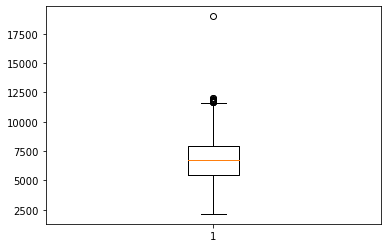

In [152]:
plt.boxplot(data_prosek['VehBCost'])
plt.show()

In [153]:
Q1 = data_prosek['VehBCost'].quantile(0.25)
Q3 = data_prosek['VehBCost'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data_prosek['VehBCost'][((data_prosek['VehBCost'] < (Q1 - 1.5 * IQR)) |(data_prosek['VehBCost'] > (Q3 + 1.5 * IQR)))]
IQR_outliers

RefId
69      11740.00
230     12030.00
256     11900.00
494     11890.00
736     12000.00
1417    11720.00
1784    11920.00
3070    11727.64
3506    11880.00
3582    11705.00
3912    11700.00
4892    11805.00
4894    19000.00
Name: VehBCost, dtype: float64

In [154]:
data_prosek.loc[data_prosek['VehBCost'] > (Q3 + 1.5 * IQR), 'VehBCost'] = (Q3 + 1.5 * IQR)

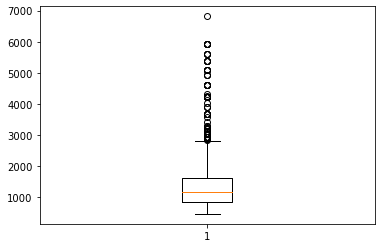

In [155]:
plt.boxplot(data_prosek['WarrantyCost'])
plt.show()

In [156]:
Q1 = data_prosek['WarrantyCost'].quantile(0.25)
Q3 = data_prosek['WarrantyCost'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data_prosek['WarrantyCost'][((data_prosek['WarrantyCost'] < (Q1 - 1.5 * IQR)) |(data_prosek['WarrantyCost'] > (Q3 + 1.5 * IQR)))]
IQR_outliers

RefId
66      3265
155     4210
349     4922
577     2871
633     3035
        ... 
6413    5913
6575    2939
6685    5092
6741    4922
6745    4622
Name: WarrantyCost, Length: 78, dtype: int64

In [157]:
data_prosek.loc[data_prosek['WarrantyCost'] > (Q3 + 1.5 * IQR), 'WarrantyCost'] = (Q3 + 1.5 * IQR)

In [158]:
####### Normalizacija ########

In [159]:
data_prosek.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6797 entries, 1 to 6798
Data columns (total 71 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchYear                          6797 non-null   int64  
 1   VehicleAge                         6797 non-null   int64  
 2   Transmission                       6797 non-null   int64  
 3   WheelType                          6797 non-null   int64  
 4   VehOdo                             6797 non-null   int64  
 5   MMRAcquisitionAuctionAveragePrice  6797 non-null   float64
 6   MMRAcquisitionRetailAveragePrice   6797 non-null   float64
 7   MMRCurrentAuctionAveragePrice      6797 non-null   float64
 8   MMRCurrentRetailAveragePrice       6797 non-null   float64
 9   VehBCost                           6797 non-null   float64
 10  WarrantyCost                       6797 non-null   float64
 11  IsBadBuy                           6797 non-null   objec

In [160]:
kol = data_prosek.columns

In [161]:
kol

Index(['PurchYear', 'VehicleAge', 'Transmission', 'WheelType', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice',
       'VehBCost', 'WarrantyCost', 'IsBadBuy', 'Make_ACURA', 'Make_BUICK',
       'Make_CADILLAC', 'Make_CHEVROLET', 'Make_CHRYSLER', 'Make_DODGE',
       'Make_FORD', 'Make_GMC', 'Make_HONDA', 'Make_HUMMER', 'Make_HYUNDAI',
       'Make_INFINITI', 'Make_ISUZU', 'Make_JEEP', 'Make_KIA', 'Make_LEXUS',
       'Make_LINCOLN', 'Make_MAZDA', 'Make_MERCURY', 'Make_MINI',
       'Make_MITSUBISHI', 'Make_NISSAN', 'Make_OLDSMOBILE', 'Make_PLYMOUTH',
       'Make_PONTIAC', 'Make_SATURN', 'Make_SCION', 'Make_SUBARU',
       'Make_SUZUKI', 'Make_TOYOTA', 'Make_VOLKSWAGEN', 'Make_VOLVO',
       'Color_BEIGE', 'Color_BLACK', 'Color_BLUE', 'Color_BROWN', 'Color_GOLD',
       'Color_GREEN', 'Color_GREY', 'Color_MAROON', 'Color_ORANGE',
       'Color_OTHER', 'Color_PURPLE', 'Color_

In [162]:
from sklearn.preprocessing import MinMaxScaler
r = MinMaxScaler(feature_range=(0, 1))
data_prosek_norm = r.fit_transform(data_prosek)
data_prosek_norm = pd.DataFrame(data_prosek_norm, columns = kol)
data_prosek_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6797 entries, 0 to 6796
Data columns (total 71 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchYear                          6797 non-null   float64
 1   VehicleAge                         6797 non-null   float64
 2   Transmission                       6797 non-null   float64
 3   WheelType                          6797 non-null   float64
 4   VehOdo                             6797 non-null   float64
 5   MMRAcquisitionAuctionAveragePrice  6797 non-null   float64
 6   MMRAcquisitionRetailAveragePrice   6797 non-null   float64
 7   MMRCurrentAuctionAveragePrice      6797 non-null   float64
 8   MMRCurrentRetailAveragePrice       6797 non-null   float64
 9   VehBCost                           6797 non-null   float64
 10  WarrantyCost                       6797 non-null   float64
 11  IsBadBuy                           6797 non-null   float

In [163]:
data_prosek_norm

,PurchYear,VehicleAge,Transmission,WheelType,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VehBCost,WarrantyCost,IsBadBuy,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,...,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN
0,0.0,0.428571,1.0,0.0,0.527277,0.245825,0.405703,0.313666,0.409916,0.289779,0.395393,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.571429,1.0,1.0,0.425985,0.145330,0.272183,0.143346,0.250259,0.205479,0.071657,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.428571,0.0,0.0,0.472364,0.300411,0.451281,0.252410,0.386466,0.194942,0.238004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.571429,1.0,0.0,0.616907,0.299489,0.391854,0.366060,0.467706,0.363541,0.056302,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.571429,1.0,1.0,0.556539,0.491881,0.606422,0.556514,0.639750,0.700738,0.195351,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6792,0.0,0.285714,1.0,0.0,0.363305,0.299797,0.275630,0.276430,0.380128,0.363541,0.030284,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6793,0.0,0.428571,1.0,1.0,0.670373,0.545392,0.477518,0.585821,0.644820,0.468915,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6794,0.0,0.857143,1.0,1.0,0.550690,0.391156,0.350776,0.444652,0.466323,0.511064,0.423544,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6795,0.0,0.285714,1.0,0.0,0.479463,0.936240,0.798843,1.000000,1.000000,0.869336,0.487951,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
####### Klasifikacija ########

In [165]:
# Koristicemo sledece algoritme klasifikacije:

#Naivni Bajes
#Stablo odlucivanja
#K najblizih suseda (KNN)
#Ansambl algoritme
#Ovim algoritmima cemo analizirati podatke nad originalnim skupom podataka i nad podacima 
#dobijenim koriscenjem razlicitih metoda za selekciju atributa, a sve u svrhu odabira najboljeg modela za nas konkretan problem.

In [166]:
alg = ['Naivni Bajes', 'KNN', 'Stablo odlucivanja', 'Logisticka regresija', 'Voting', 'Bagging', 'Random forest']
data_alg_rez = pd.DataFrame(alg)

In [167]:
data_alg_rez

,0
0,Naivni Bajes
1,KNN
2,Stablo odlucivanja
3,Logisticka regresija
4,Voting
5,Bagging
6,Random forest


In [168]:
data_alg_rez.columns = ['Algoritam']
data_alg_rez = data_alg_rez.set_index('Algoritam')

In [169]:
x_n = data_prosek_norm.loc[:, data_prosek_norm.columns != 'IsBadBuy']
y_n = data_prosek_norm.loc[:, 'IsBadBuy']

In [170]:
# Klasifikacija je tip nadgledanog ucenja, pa moramo podeliti dataset na trening i test

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_n, y_n, test_size = 0.3, random_state=10)

In [172]:
model_nb = GaussianNB()
model_knn = KNeighborsClassifier()
model_dt = DecisionTreeClassifier()
model_log = LogisticRegression()
model_voting = VotingClassifier(voting='soft', estimators=[('nb',model_nb),('knn',model_knn),('tree', model_dt),('log', model_log)])
model_bagging = BaggingClassifier(base_estimator=model_log, bootstrap=10)
model_rf = RandomForestClassifier(n_estimators=100, oob_score=True)

lista = list()
for model in [model_nb, model_knn, model_dt, model_log, model_voting, model_bagging, model_rf]:
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='roc_auc')
    lista.append(round(np.mean(scores)*100, 2))
data_alg_rez['Inicijalni skup podataka'] = lista

In [173]:
# Odredjujemo optimalan broj modela logisticke regresije u Bagging-u

In [174]:
model_bagging_proba20 = BaggingClassifier(base_estimator=model_log, bootstrap=20)
model_bagging_proba40 = BaggingClassifier(base_estimator=model_log, bootstrap=40)
model_bagging_proba10 = BaggingClassifier(base_estimator=model_log, bootstrap=10)


In [175]:
print(cross_val_score(model_bagging_proba10, X_train, Y_train, cv=10, scoring='roc_auc').mean())
print(cross_val_score(model_bagging_proba20, X_train, Y_train, cv=10, scoring='roc_auc').mean())
print(cross_val_score(model_bagging_proba40, X_train, Y_train, cv=10, scoring='roc_auc').mean())

0.6672341253824994
0.6727675825659492
0.6698831725094725


In [176]:
# Vidimo da izmenom parametra bootstrap (koliko ce modela uzimati u obzir) ne dobijamo bolje rezultate, tako da cemo ostaviti
# 10 jer je to najmanji broj, a samim tim uticemo i na vreme izvrsavanja

In [177]:
data_alg_rez

,Inicijalni skup podataka
Algoritam,
Naivni Bajes,50.34
KNN,55.23
Stablo odlucivanja,52.70
Logisticka regresija,67.14
Voting,60.74
Bagging,66.82
Random forest,63.45


In [178]:
data_original = pd.DataFrame()

In [179]:
data_original = data.loc[:, ['MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailCleanPrice']]

In [180]:
data_original

,MMRAcquisitionAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailCleanPrice
RefId,,,,
1,4760.0,8457.0,5557.0,8702.0
2,2675.0,5690.0,2646.0,5518.0
3,5054.0,8707.0,4384.0,7911.0
4,4908.0,8577.0,5827.0,9451.0
5,8051.0,12443.0,8934.0,12560.0
...,...,...,...,...
6794,4892.0,5783.0,4714.0,8766.0
6795,8601.0,9789.0,8859.0,12190.0
6796,5988.0,6967.0,7185.0,9754.0


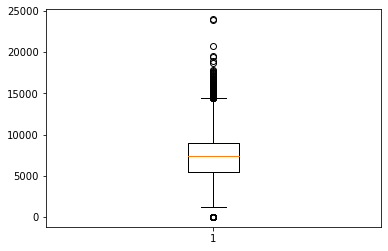

In [181]:
plt.boxplot(data_original['MMRAcquisitionAuctionCleanPrice'])
plt.show()

In [182]:
Q1 = data_original['MMRAcquisitionAuctionCleanPrice'].quantile(0.25)
Q3 = data_original['MMRAcquisitionAuctionCleanPrice'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data_original['MMRAcquisitionAuctionCleanPrice'][((data_original['MMRAcquisitionAuctionCleanPrice'] < (Q1 - 1.5 * IQR)) |(data_original['MMRAcquisitionAuctionCleanPrice'] > (Q3 + 1.5 * IQR)))]
IQR_outliers

RefId
9       15664.0
43      18927.0
118         0.0
183         0.0
216     15016.0
         ...   
6353    16455.0
6472    14518.0
6607    15072.0
6627        1.0
6684        0.0
Name: MMRAcquisitionAuctionCleanPrice, Length: 164, dtype: float64

In [183]:
data_original.loc[data_original['MMRAcquisitionAuctionCleanPrice'] > (Q3 + 1.5 * IQR), 'MMRAcquisitionAuctionCleanPrice'] = (Q3 + 1.5 * IQR)

In [184]:
data_original.loc[data_original['MMRAcquisitionAuctionCleanPrice']  < (Q1 - 1.5 * IQR), 'MMRAcquisitionAuctionCleanPrice'] = (Q1 - 1.5 * IQR)

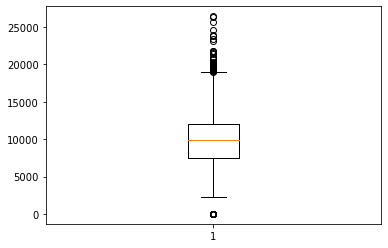

In [185]:
plt.boxplot(data_original['MMRAcquisitonRetailCleanPrice'])
plt.show()

In [186]:
Q1 = data_original['MMRAcquisitonRetailCleanPrice'].quantile(0.25)
Q3 = data_original['MMRAcquisitonRetailCleanPrice'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data_original['MMRAcquisitonRetailCleanPrice'][((data_original['MMRAcquisitonRetailCleanPrice'] < (Q1 - 1.5 * IQR)) |(data_original['MMRAcquisitonRetailCleanPrice'] > (Q3 + 1.5 * IQR)))]
IQR_outliers

RefId
9       21702.0
43      23457.0
118         0.0
183         0.0
230     19320.0
         ...   
6224    19721.0
6353    20768.0
6607    19412.0
6627        0.0
6684        0.0
Name: MMRAcquisitonRetailCleanPrice, Length: 113, dtype: float64

In [187]:
data_original.loc[data_original['MMRAcquisitonRetailCleanPrice'] > (Q3 + 1.5 * IQR), 'MMRAcquisitonRetailCleanPrice'] = (Q3 + 1.5 * IQR)

In [188]:
data_original.loc[data_original['MMRAcquisitonRetailCleanPrice']  < (Q1 - 1.5 * IQR), 'MMRAcquisitonRetailCleanPrice'] = (Q1 - 1.5 * IQR)

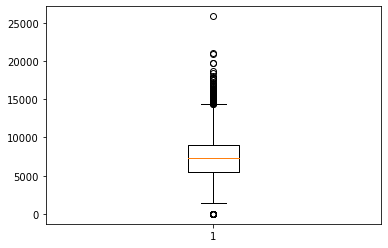

In [189]:
plt.boxplot(data_original['MMRCurrentAuctionCleanPrice'])
plt.show()

In [190]:
Q1 = data_original['MMRCurrentAuctionCleanPrice'].quantile(0.25)
Q3 = data_original['MMRCurrentAuctionCleanPrice'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data_original['MMRCurrentAuctionCleanPrice'][((data_original['MMRCurrentAuctionCleanPrice'] < (Q1 - 1.5 * IQR)) |(data_original['MMRCurrentAuctionCleanPrice'] > (Q3 + 1.5 * IQR)))]
IQR_outliers

RefId
9       14974.0
43      18461.0
118         0.0
183         0.0
216     14858.0
         ...   
6472    16108.0
6607    14908.0
6627        1.0
6684        0.0
6797    15015.0
Name: MMRCurrentAuctionCleanPrice, Length: 132, dtype: float64

In [191]:
data_original.loc[data_original['MMRCurrentAuctionCleanPrice'] > (Q3 + 1.5 * IQR), 'MMRCurrentAuctionCleanPrice'] = (Q3 + 1.5 * IQR)

In [192]:
data_original.loc[data_original['MMRCurrentAuctionCleanPrice']  < (Q1 - 1.5 * IQR), 'MMRCurrentAuctionCleanPrice'] = (Q1 - 1.5 * IQR)

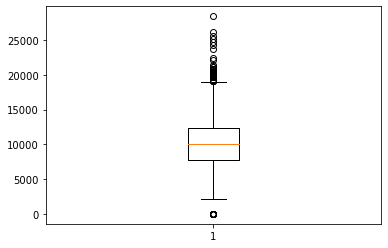

In [193]:
plt.boxplot(data_original['MMRCurrentRetailCleanPrice'])
plt.show()

In [194]:
Q1 = data_original['MMRCurrentRetailCleanPrice'].quantile(0.25)
Q3 = data_original['MMRCurrentRetailCleanPrice'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = data_original['MMRCurrentRetailCleanPrice'][((data_original['MMRCurrentRetailCleanPrice'] < (Q1 - 1.5 * IQR)) |(data_original['MMRCurrentRetailCleanPrice'] > (Q3 + 1.5 * IQR)))]
IQR_outliers

RefId
9       19975.0
43      22416.0
118         0.0
183         0.0
260         0.0
         ...   
6296    19616.0
6310    19096.0
6627        0.0
6684        0.0
6797    19161.0
Name: MMRCurrentRetailCleanPrice, Length: 80, dtype: float64

In [195]:
data_original.loc[data_original['MMRCurrentRetailCleanPrice'] > (Q3 + 1.5 * IQR), 'MMRCurrentRetailCleanPrice'] = (Q3 + 1.5 * IQR)

In [196]:
data_original.loc[data_original['MMRCurrentRetailCleanPrice']  < (Q1 - 1.5 * IQR), 'MMRCurrentRetailCleanPrice'] = (Q1 - 1.5 * IQR)

In [197]:
kol1 = data_original.columns
r = MinMaxScaler(feature_range=(0, 1))
data_original = r.fit_transform(data_original)
data_original = pd.DataFrame(data_original, columns = kol1)
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6797 entries, 0 to 6796
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MMRAcquisitionAuctionCleanPrice  6797 non-null   float64
 1   MMRAcquisitonRetailCleanPrice    6797 non-null   float64
 2   MMRCurrentAuctionCleanPrice      6797 non-null   float64
 3   MMRCurrentRetailCleanPrice       6797 non-null   float64
dtypes: float64(4)
memory usage: 212.5 KB


In [198]:
data_original = pd.concat([data_original, data_prosek_norm], axis = 1)

In [199]:
data_original.head(50)

,MMRAcquisitionAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailCleanPrice,PurchYear,VehicleAge,Transmission,WheelType,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VehBCost,WarrantyCost,IsBadBuy,Make_ACURA,...,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN
0,0.329501,0.427505,0.383410,0.424365,0.0,0.428571,1.0,0.0,0.527277,0.245825,0.405703,0.313666,0.409916,0.289779,0.395393,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.184669,0.276797,0.179387,0.246963,0.0,0.571429,1.0,1.0,0.425985,0.145330,0.272183,0.143346,0.250259,0.205479,0.071657,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.349924,0.441122,0.301198,0.380293,0.0,0.428571,0.0,0.0,0.472364,0.300411,0.451281,0.252410,0.386466,0.194942,0.238004,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.339782,0.434041,0.402334,0.466097,0.0,0.571429,1.0,0.0,0.616907,0.299489,0.391854,0.366060,0.467706,0.363541,0.056302,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.558106,0.644608,0.620094,0.639319,0.0,0.571429,1.0,1.0,0.556539,0.491881,0.606422,0.556514,0.639750,0.700738,0.195351,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.406606,0.471405,0.438008,0.492172,1.0,0.285714,1.0,0.0,0.057164,0.385321,0.495749,0.423741,0.494670,0.395153,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.326723,0.404630,0.370514,0.442640,1.0,0.428571,1.0,1.0,0.510853,0.277916,0.378882,0.345072,0.428008,0.258166,0.045639,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.558593,0.625436,0.512581,0.602379,1.0,0.571429,1.0,0.0,0.603339,0.479214,0.599585,0.520678,0.650697,0.584826,0.395393,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,1.000000,1.000000,1.000000,1.0,0.571429,1.0,1.0,0.686760,0.921577,1.000000,0.895522,0.927720,0.837724,0.166773,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.589157,0.641667,0.650652,0.680939,1.0,0.714286,1.0,1.0,0.529986,0.534644,0.633184,0.632152,0.677950,0.848261,0.195351,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
data_original.loc[:,'IsBadBuy'] = data_original.loc[:,'IsBadBuy'] - 1

In [201]:
data_original.loc[:,'IsBadBuy'] = data_original.loc[:,'IsBadBuy'] * (-1)

In [202]:
x_o_n = data_original.loc[:, data_original.columns != 'IsBadBuy']
y_o_n = data_original.loc[:, 'IsBadBuy']

In [203]:
# Moramo i drugi dataset sa svim MMR podacima da podelimo na trening i test

In [204]:
from sklearn.model_selection import train_test_split
X_train_o, X_test_o, Y_train_o, Y_test_o = train_test_split(x_o_n, y_o_n, test_size = 0.3, random_state=10)

In [205]:
lista1 = list()
for model in [model_nb, model_knn, model_dt, model_log, model_voting, model_bagging, model_rf]:
    scores = cross_val_score(model, X_train_o, Y_train_o, cv=10, scoring='roc_auc')
    lista1.append(round(np.mean(scores)*100, 2))
data_alg_rez['Potpuni skup podataka'] = lista1

In [206]:
data_alg_rez.sort_values

<bound method DataFrame.sort_values of                       Inicijalni skup podataka  Potpuni skup podataka
Algoritam                                                            
Naivni Bajes                             50.34                  59.91
KNN                                      55.23                  55.11
Stablo odlucivanja                       52.70                  53.16
Logisticka regresija                     67.14                  67.20
Voting                                   60.74                  61.61
Bagging                                  66.82                  67.21
Random forest                            63.45                  63.27>

In [207]:
# Dalje cemo raditi sa potpunim skupom podataka, jer vidimo da nema znacajne razlike u rezultatima

In [208]:
lista2 = list()
for model in [model_nb, model_knn, model_dt, model_log, model_voting, model_bagging, model_rf]:
    scores = cross_val_score(model, x_o_n, y_o_n, cv=10, scoring='accuracy')
    lista2.append(round(np.mean(scores)*100, 2))
data_alg_rez['Potpuni skup podataka sa ACC'] = lista2

In [209]:
data_alg_rez

,Inicijalni skup podataka,Potpuni skup podataka,Potpuni skup podataka sa ACC
Algoritam,,,
Naivni Bajes,50.34,59.91,13.71
KNN,55.23,55.11,85.91
Stablo odlucivanja,52.70,53.16,77.40
Logisticka regresija,67.14,67.20,87.23
Voting,60.74,61.61,77.78
Bagging,66.82,67.21,87.26
Random forest,63.45,63.27,87.02


In [210]:
model_voting2 = VotingClassifier(voting='soft', estimators=[('knn',model_knn),('tree', model_dt), ('log', model_log)])

In [211]:
cross_val_score(model_voting2, x_o_n, y_o_n, cv=10, scoring='accuracy').mean()

0.8533199774755262

In [212]:
# Vidimo da nam Voting radi bolje ukoliko izbacimo Naivnog Bajesa jer on pretpostavlja da su promenljive medjusobno nezavisne,
# a znamo da imamo 8 varijabli koje su bas jako korelisane

In [216]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [217]:
from mlxtend.classifier import StackingClassifier

In [218]:
model_stacking = StackingClassifier(classifiers=[model_knn, model_dt, model_log], meta_classifier=LogisticRegression(solver='liblinear'), use_features_in_secondary = True)

In [219]:
cross_val_score(model_stacking, x_o_n, y_o_n, cv=10, scoring='roc_auc').mean()

0.640721501170322

In [220]:
cross_val_score(model_stacking, x_o_n, y_o_n, cv=10, scoring='accuracy').mean()

0.782255912674348

In [ ]:
# Vidimo da nam najbolje rezultate daju logisticka regresija i KNN, kao i kombinacija  ova dva algoritma i drveta
# koristeci Voting i Stacking, ali cemo Voting izbaciti iz dalje analize i ostalim modelima uraditi predvidjanja
# kako bismo poredile rezultate i odlucile se za najbolji model

In [ ]:
# Predvidjanja

In [221]:
model_log.fit(X_train_o, Y_train_o)
predictions_log = model_log.predict(X_train_o)
pd.DataFrame({'stvarno':Y_train_o, 'predvidjeno':predictions_log}).head(13)

,stvarno,predvidjeno
554,1.0,1.0
5591,1.0,1.0
2516,1.0,1.0
3588,-0.0,1.0
3760,1.0,1.0
53,1.0,1.0
1775,1.0,1.0
2950,1.0,1.0
4738,1.0,1.0
3012,1.0,1.0


In [222]:
model_knn.fit(X_train_o, Y_train_o)
predictions_knn = model_knn.predict(X_train_o)
pd.DataFrame({'stvarno':Y_train_o, 'predvidjeno':predictions_knn}).head(13)

,stvarno,predvidjeno
554,1.0,1.0
5591,1.0,1.0
2516,1.0,1.0
3588,-0.0,1.0
3760,1.0,1.0
53,1.0,1.0
1775,1.0,1.0
2950,1.0,1.0
4738,1.0,1.0
3012,1.0,1.0


In [223]:
model_stacking.fit(X_train_o, Y_train_o)
predictions_stacking = model_stacking.predict(X_train_o)
pd.DataFrame({'stvarno':Y_train_o, 'predvidjeno':predictions_stacking}).head(13)

,stvarno,predvidjeno
554,1.0,1.0
5591,1.0,1.0
2516,1.0,1.0
3588,-0.0,-0.0
3760,1.0,1.0
53,1.0,1.0
1775,1.0,1.0
2950,1.0,1.0
4738,1.0,1.0
3012,1.0,1.0


In [224]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [225]:
print('Recall logisticka regresija: ', recall_score(Y_test_o, model_log.predict(X_test_o)))
print('Recall KNN: ', recall_score(Y_test_o, model_knn.predict(X_test_o)))
print('Recall Stacking: ', recall_score(Y_test_o, model_stacking.predict(X_test_o)))

print('Precision logisticka regresija: ', precision_score(Y_test_o, model_log.predict(X_test_o)))
print('Precision KNN: ', precision_score(Y_test_o, model_knn.predict(X_test_o)))
print('Precision Stacking: ', precision_score(Y_test_o, model_stacking.predict(X_test_o)))

print('F1 logisticka regresija: ',f1_score(Y_test_o, model_log.predict(X_test_o)))
print('F1 KNN: ', f1_score(Y_test_o, model_knn.predict(X_test_o)))
print('F1 Stacking: ',f1_score(Y_test_o, model_stacking.predict(X_test_o)))

Recall logisticka regresija:  1.0
Recall KNN:  0.9854260089686099
Recall Stacking:  0.8862107623318386
Precision logisticka regresija:  0.8745098039215686
Precision KNN:  0.8772455089820359
Precision Stacking:  0.8832402234636871
F1 logisticka regresija:  0.9330543933054394
F1 KNN:  0.928194297782471
F1 Stacking:  0.884722999440403


In [ ]:
# Menjamo granicu odlucivanja jer nam disbalans klasa izlazne promenljive znatno utice na predvidjanje

In [226]:
prob_log = model_log.predict_proba(X_test_o)[:, 1] >= 0.9
prob_knn = model_knn.predict_proba(X_test_o)[:, 1] >= 0.9
prob_stacking = model_stacking.predict_proba(X_test_o)[:, 1] >= 0.9

In [227]:
print('Recall logisticka regresija: ', recall_score(Y_test_o, prob_log))
print('Recall KNN: ', recall_score(Y_test_o, prob_knn))
print('Recall Stacking: ', recall_score(Y_test_o, prob_stacking))

print('Precision logisticka regresija: ', precision_score(Y_test_o, prob_log))
print('Precision KNN: ', precision_score(Y_test_o, prob_knn))
print('Precision Stacking: ', precision_score(Y_test_o, prob_stacking))

print('F1 logisticka regresija: ',f1_score(Y_test_o, prob_log))
print('F1 KNN: ', f1_score(Y_test_o, prob_knn))
print('F1 Stacking: ',f1_score(Y_test_o, prob_stacking))

Recall logisticka regresija:  0.48878923766816146
Recall KNN:  0.5571748878923767
Recall Stacking:  0.8862107623318386
Precision logisticka regresija:  0.9247083775185578
Precision KNN:  0.9003623188405797
Precision Stacking:  0.8832402234636871
F1 logisticka regresija:  0.6395306197286396
F1 KNN:  0.6883656509695291
F1 Stacking:  0.884722999440403


In [228]:
confusion_matrix(Y_test_o, model_log.predict(X_test_o))

array([[   0,  256],
       [   0, 1784]], dtype=int64)

In [229]:
confusion_matrix(Y_test_o, model_knn.predict(X_test_o))

array([[  10,  246],
       [  26, 1758]], dtype=int64)

In [230]:
confusion_matrix(Y_test_o, model_stacking.predict(X_test_o))

array([[  47,  209],
       [ 203, 1581]], dtype=int64)

In [2]:
# Uocavamo da smo dobili zadovoljavajuce rezultate za precision sto nam je svakako bitnije i mozemo videti da nam KNN 
# definitivno radi najbolje